In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [13]:
titanic_mean = titanic.copy()
means = titanic_mean.Survived.groupby(titanic_mean.Sex).mean()
display(means)
titanic_mean["Sex_encoded"] = titanic_mean.Sex.map(means)
titanic_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Sex_encoded  
0        0         A/5 21171   7.2500   NaN        S     0.188908  
1        0          PC 17599  71.2833   C85        C     0.742038  
2        0  STON/O2. 3101282   7.9250   NaN        S     0.742038  
3        0            113803  53.1000  C123        S     0.742038  
4        0            373450   8.0500   NaN        S     0.188908  
..     ...               ...      ...   ...      ...          ...  
886      0            211536  13.0000   NaN        S     0.188908  
887      0            112053  30.0000   B42        S     0.742038  
888      2        W./C. 6607  23.4500   NaN        S     0.742038  
889      0            111369  30.0000  C148        C     0.188908  
890      0            370376   7.7500   NaN        Q     0.188908  

[891 rows x 13 columns]

Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

SyntaxError: invalid syntax (<ipython-input-76-9914ed083067>, line 5)

Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [14]:
from sklearn.preprocessing import LabelEncoder
cabin_enc = titanic.copy()
cabin_enc["Cabin"]=cabin_enc.Cabin.astype(str)
e=LabelEncoder()
cabin_enc["Cabin_enc"]=e.fit_transform(cabin_enc.Cabin)
display(cabin_enc)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Cabin_enc  
0        0         A/5 21171   7.2500   nan        S        147  
1        0          PC 17599  71.2833   C85        C         81  
2        0  STON/O2. 3101282   7.9250   nan        S        147  
3        0            113803  53.1000  C123        S         55  
4        0            373450   8.0500   nan        S        147  
..     ...               ...      ...   ...      ...        ...  
886      0            211536  13.0000   nan        S        147  
887      0            112053  30.0000   B42        S         30  
888      2        W./C. 6607  23.4500   nan        S        147  
889      0            111369  30.0000  C148        C         60  
890      0            370376   7.7500   nan        Q        147  

[891 rows x 13 columns]

# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

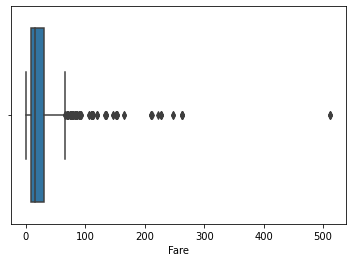

In [38]:
sns.boxplot(titanic["Fare"])

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [15]:
z_score = (titanic['Fare'] - titanic['Fare'].mean() ) / titanic['Fare'].std()

In [16]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [69]:
~(z_score<-3) | (z_score>3)

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool

In [19]:
titanic["Fare"].min(), titanic["Fare"].max(), titanic.shape

(0.0, 512.3292, (891, 12))

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [71]:
upper_replace_value = titanic[z_score<=3]['Fare'].max()
lower_replace_value = titanic[z_score>=-3]['Fare'].min()

In [25]:
titanic_zscore_replaced = titanic.copy()
titanic_zscore_replaced["Fare"][z_score>3] = upper_replace_value
titanic_zscore_replaced["Fare"][z_score<-3] = lower_replace_value

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
titanic["Fare"].min(), titanic["Fare"].max()

(0.0, 512.3292)

In [24]:
titanic_zscore_replaced["Fare"].min(), titanic_zscore_replaced["Fare"].max(), titanic_zscore_replaced.shape

(0.0, 164.8667, (891, 12))

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [28]:
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)

In [29]:
iqr = q3-q1
iqr

23.0896

In [55]:
from scipy import stats
iqr = stats.iqr(titanic.Fare)
iqr

23.0896

In [56]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

In [58]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [60]:
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_iqr_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
titanic_iqr_replaced["Fare"] .min(), titanic_iqr_replaced["Fare"] .max(), titanic_iqr_replaced.shape

(0.0, 65.6344, (891, 12))

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [63]:
lower_limit = titanic["Fare"].quantile(q=0.01)
upper_limit = titanic["Fare"].quantile(q=0.99)

In [64]:
lower_limit, upper_limit

(0.0, 249.00622000000033)

In [65]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

9

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [66]:
titanic_he_replaced = titanic.copy()
titanic_he_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_he_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
titanic_he_replaced["Fare"] .min(), titanic_he_replaced["Fare"] .max(), titanic_he_replaced.shape

(0.0, 249.00622000000033, (891, 12))

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

Z-score daha önemli olabilir. Nedeni Z-score ile birlikte daha az outlier buluyoruz ve bu yüzden de daha az veri kaybediyoruz.